<a href="https://colab.research.google.com/github/melinadwisafitri/mental-care/blob/front-end/testing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
data = 'Bagaimana cara mengendalikan 1 emosi?'
rgx = re.compile(r'(\d+)|[^\s\w]')
rgb = rgx.sub(lambda x: x.group(1), data)

In [2]:
rgb

'Bagaimana cara mengendalikan 1 emosi'

In [3]:
pip install sastrawi

     |████████████████████████████████| 209 kB 4.1 MB/s 


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[(['hai'], 'salam_pembuka'), (['hallo'], 'salam_pembuka'), (['apa', 'kabar'], 'apa kabar'), (['bagaimana', 'kabarmu'], 'apa kabar'), (['apakah', 'kamu', 'baikbaik', 'saja'], 'apa kabar'), (['terimakasih'], 'salam_penutup'), (['sampai', 'ketemu', 'lagi'], 'salam_penutup'), (['apa', 'itu', 'kesehatan', 'mental'], 'pengertian_mental_health'), (['kesehatan', 'mental'], 'pengertian_mental_health'), (['apa', 'yang', 'dimaksud', 'dengan', 'kesehatan', 'mental'], 'pengertian_mental_health'), (['kesehatan', 'mental', '

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Epoch 1/200
14/14 [==============================] - 1s 25ms/step - loss: 3.4958 - accuracy: 0.0000e+00 - val_loss: 3.4038 - val_accuracy: 0.0000e+00
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 3.4501 - accuracy: 0.0143 - val_loss: 3.4025 - val_accuracy: 0.0000e+00
Epoch 3/200
14/14 [==============================] - 0s 6ms/step - loss: 3.2899 - accuracy: 0.1429 - val_loss: 3.3995 - val_accuracy: 0.0323
Epoch 4/200
14/14 [==============================] - 0s 7ms/step - loss: 3.3234 - accuracy: 0.1143 - val_loss: 3.3947 - val_accuracy: 0.1290
Epoch 5/200
14/14 [==============================] - 0s 5ms/step - loss: 3.2058 - accuracy: 0.1714 - val_loss: 3.3927 - val_accuracy: 0.1613
Epoch 6/200
14/14 [==============================] - 0s 5ms/step - loss: 3.2074 - accuracy: 0.1857 - val_loss: 3.3889 - val_accuracy: 0.1613
Epoch 7/200
14/14 [==============================] - 0s 6ms/step - loss: 3.1169 - accuracy: 0.2000 - val_loss: 3.3880 - val_accuracy: 0.0968


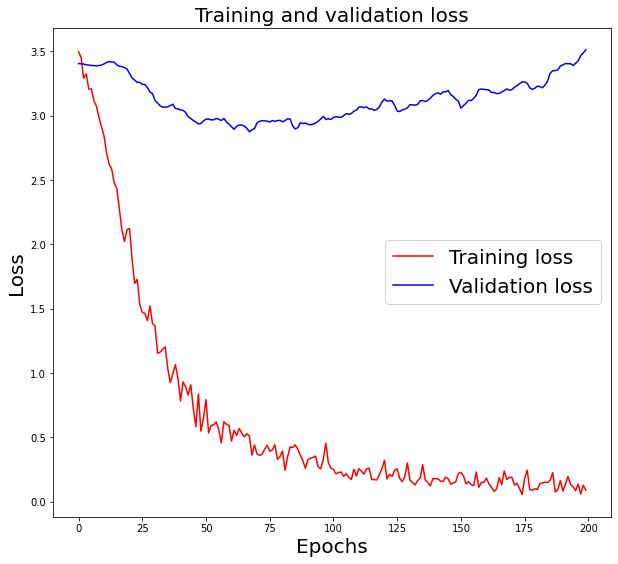

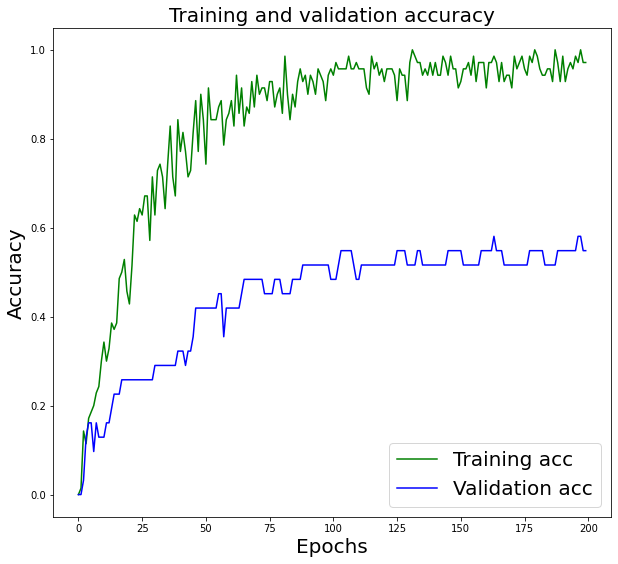

In [4]:
# -*- coding: utf-8 -*-
"""Chatbot Capstone.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1W5sTHfx5gAgh2SNt_pKXg9Ccdy6hnisD
"""

# pip install Sastrawi

import urllib.request
import json
import numpy as np

import nltk
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

data_url = 'https://raw.githubusercontent.com/melinadwisafitri/mental-care/machine-learning/dataset/data.json'
urllib.request.urlretrieve(data_url, 'data.json')

with open('data.json', 'r') as f:
  data = json.load(f)

kata = []
kelas = []
dokumen = []

punct = ['!', '?', ',', '.']

stop = stopwords.words('indonesian')
for data in data['mental_healths']:
  for question in data['question']:
    word = question.lower()
    word = word.translate(str.maketrans("","",string.punctuation))
    word = word_tokenize(word)
    if word in stop:
      continue
    kata.extend(word)
    dokumen.append((word, data['tag']))
    if data['tag'] not in kelas:
      kelas.append(data['tag'])

print(dokumen)
print(kata)
print(kelas)

import pickle

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#w = w.translate(str.maketrans("","",string.punctuation))
# kata = "kesehatan mental adalah. , ;"
# stemmer.stem(kata)

kata = [stemmer.stem(w.lower()) for w in kata if w not in punct]
kata = sorted(list(set(kata)))
kelas = sorted(list(set(kelas)))
print (len(dokumen), "dokumen")
print (len(kelas), "kelas", kelas)
print (len(kata), "unique stemming words", kata)
pickle.dump(kata,open('kata.pkl','wb')) 
pickle.dump(kelas,open('kelas.pkl','wb'))

import random
import numpy as np

training = []
output_empty = [0] * len(kelas)
for doc in dokumen:
    bag = []
    pattern_words = doc[0]
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    for w in kata:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[kelas.index(doc[1])] = 1

    training.append([bag, output_row])
random.shuffle(training)
training = np.array(training)
x_train = list(training[:,0])
y_train = list(training[:,1])

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import tensorflow as tf

model = Sequential()
model.add(Dense(128, input_shape=(len(x_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(128,input_shape=(len(x_train[0]),), activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(len(y_train[0]), activation='softmax')
# ])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(np.array(x_train), np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)), epochs=200, batch_size=5, verbose=1)

import matplotlib.pyplot as plt

history_dict = hist.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = hist.epoch

plt.figure(figsize=(10,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(10,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.show()

model = model.save("model2.h5")

In [5]:
import nltk
import pickle
import numpy as np
import json
import random
import urllib.request
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import load_model

lemmatize = WordNetLemmatizer()
model = load_model('model2.h5')
url = 'https://raw.githubusercontent.com/melinadwisafitri/mental-care/machine-learning/dataset/data.json'
urllib.request.urlretrieve(url, 'data.json')
with open('data.json', 'r') as file:
    dataset = json.load(file)

with open('kelas.pkl', 'rb') as c:
    classess = pickle.load(c)

with open('kata.pkl', 'rb') as w:
    word = pickle.load(w)


def prepare_data(text):
    text_word = nltk.word_tokenize(text)
    # text_word = [lemmatize.lemmatize(t.lower()) for t in text_word]
    return text_word


def bag_word(text, words, show_detail=True):
    text_word = prepare_data(text)
    bag = [0] * len(word)
    for s in text_word:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_detail:
                    print("found bag %s" %w)
    return np.array(bag)

def predict_chat(text, model):
    predict = bag_word(text, word, show_detail=False)
    res = model.predict(np.array([predict]))[0]
    ERROR = 0.05
    values = [[i, r] for i, r in enumerate(res)]
    values.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in values:
        return_list.append(({"class": classess[r[0]], "probability": str(r[1])}))
    return return_list


def responses(mental_chat, data_json):
    tag = mental_chat[0]['class']
    list_data = data_json['mental_healths']
    global val
    for i in list_data:
        if i['tag'] == tag:
            val = random.choice((i['answer']))
            break
        else:
            val = "you must ask the right question"
    return val


def chat_response(message):
    mental_dataset = predict_chat(message, model)
    res = responses(mental_dataset, dataset)
    return res



In [7]:
msg = input('')
chat_response(msg)

kesehatan mental adalah


'Kesehatan mental yang baik adalah kondisi ketika batin kita berada dalam keadaan tentram dan tenang, sehingga memungkinkan kita untuk menikmati kehidupan sehari-hari dan menghargai orang lain di sekitar.'